# Linear Model

## Imports

In [1]:
# 3rd Party
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# This repo:
from data import dataretriever

## Data

Use the dataretriever to get the the MNIST data in a numpy array, downloaded straight from its original source: http://yann.lecun.com/exdb/mnist/index.html. The first column of this data are the labels, with an integer representing the digit
encoded in the image, while the other columns of this data are the pixel values (between 0 and 255).

As a preprocessing step, the labels are converted to a one-hot encoded sparse matrix via the OneHotEncoder of sklearn. [One hot encoding](https://en.wikipedia.org/wiki/One-hot) is just a way of replacing each integer in the label vector with a row of zeros, except at the position specified by the integer, where you put a 1.

Note that the inverse transformation of the one-hot encoding can always be performed by taking the `argmax` along `axis=1`.

Secondly, the image values are specified by an integer between 0 and 255. We convert these pixel values to a float between 0 and 1.

In [2]:
train_data, test_data = dataretriever.np.get()
train_labels = train_data[:,0]
train_labels_onehot = np.zeros((len(train_labels), 10))
train_labels_onehot[np.arange(len(train_labels)),train_labels] = 1
train_values = np.float32(train_data[:,1:])/255

test_labels = test_data[:,0]
test_labels_onehot = np.zeros((len(test_labels), 10))
test_labels_onehot[np.arange(len(test_labels)),test_labels] = 1
test_values = np.float32(test_data[:,1:])/255

We can visualize the different digits by writing a visualization function that reshapes the 784D train and test values into a 28x28 grid:

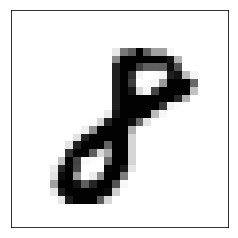

In [3]:
def show_digit(digit_array):
    plt.imshow(digit_array.reshape(28,28), cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
show_digit(train_values[31])

# Train

We train a simple linear regression model to arrive at a test accuracy of 0.86:

In [4]:
#from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge as LR  # alternative for normal LR

lr = LR()
lr.fit(train_values, train_labels_onehot)

train_predict_onehot = lr.predict(train_values)
test_predict_onehot = lr.predict(test_values)

# Take the maximum value along the first axis to convert back 
# from onehot encoding to integer labels.
train_predict = np.argmax(train_predict_onehot, axis=1)
test_predict = np.argmax(test_predict_onehot, axis=1)


# Calculate the accuracy
train_accuracy = np.mean(train_predict == train_labels)
test_accuracy = np.mean(test_predict == test_labels)

print(f"train accuracy:{train_accuracy}\ttest accuracy:{test_accuracy}")

train accuracy:0.8574	test accuracy:0.8604
